# <span style="color:darkblue"> Lecture 10: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda activate qtm151```

```conda install statsmodels```

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [3]:
dataset = pd.DataFrame()

<font size = "5">

Create two random variables of size ($n = 50$)

In [4]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [5]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [6]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

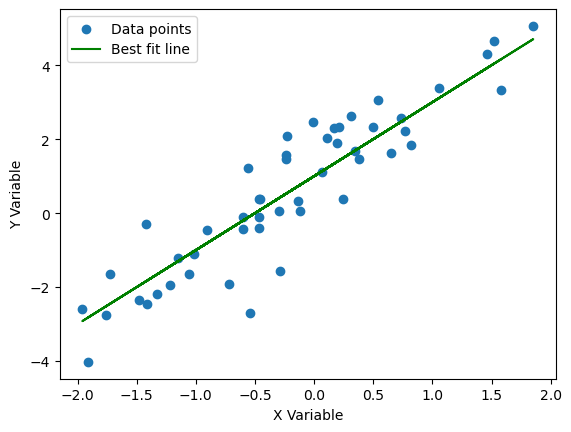

In [7]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [8]:
# Write your own code here
subset_above2 = dataset.query('y>=2')
print(len(dataset))
print(len(subset_above2))
print(len(subset_above2)/len(dataset))


50
15
0.3


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [19]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset['y'].mean()
stdv_sample = dataset['y'].std()

dataset.query('abs(y-@ybar)<=@stdv_sample')


,x,e,y,p,p_estimated
0,0.496714,0.324084,2.317512,1.993428,2.085649
1,-0.138264,-0.385082,0.338389,0.723471,0.750241
2,0.647689,-0.676922,1.618455,2.295377,2.403160
4,-0.234153,1.031000,1.562693,0.531693,0.548579
5,-0.234137,0.931280,1.463006,0.531726,0.548614
7,0.767435,-0.309212,2.225657,2.534869,2.654995
8,-0.469474,0.331263,0.392315,0.061051,0.053682
10,-0.463418,-0.479174,-0.406010,0.073165,0.066419
11,-0.465730,-0.185659,-0.117118,0.068540,0.061557
12,0.241962,-1.106335,0.377590,1.483925,1.549887


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [10]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     389.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.14e-24
Time:                        22:32:18   Log-Likelihood:                -63.422
No. Observations:                  50   AIC:                             130.8
Df Residuals:                      48   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0410      0.122      8.533      0.000       0.802       1.280
x              2.1031      0.107     19.727      0.000       1.894       2.312
==============================================================================
Omnibus:                        3.643   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.563
Skew:                          -0.464   Prob(JB):                        0.278
Kurtosis:                       3.608   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<font size = "5">

Compute the estimated best fit line

In [21]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


In [13]:
dataset

,x,e,y,p,p_estimated
0,0.496714,0.324084,2.317512,1.993428,2.085649
1,-0.138264,-0.385082,0.338389,0.723471,0.750241
2,0.647689,-0.676922,1.618455,2.295377,2.403160
3,1.523030,0.611676,4.657736,4.046060,4.244069
4,-0.234153,1.031000,1.562693,0.531693,0.548579
5,-0.234137,0.931280,1.463006,0.531726,0.548614
6,1.579213,-0.839218,3.319208,4.158426,4.362226
7,0.767435,-0.309212,2.225657,2.534869,2.654995
8,-0.469474,0.331263,0.392315,0.061051,0.053682
9,0.542560,0.975545,3.060665,2.085120,2.182067


<font size = "5">

Plot the best fit line

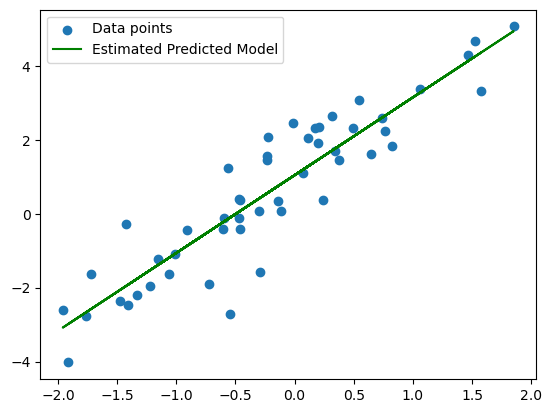

In [14]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

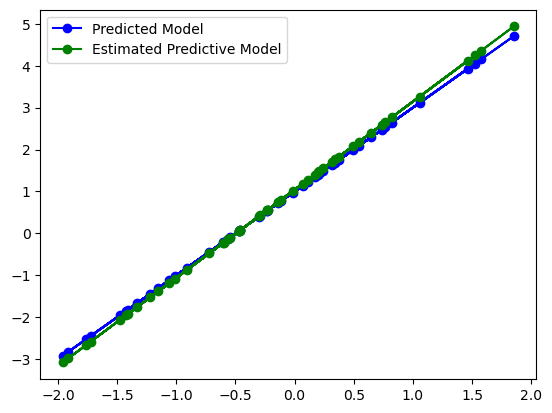

In [15]:
# Write your own code
plt.plot(dataset["x"],dataset["p"], "-o", color = 'blue')
plt.plot(dataset["x"],dataset["p_estimated"], "-o", color = 'green')

plt.legend(labels = ["Predicted Model", "Estimated Predictive Model"])

<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [16]:
# Write your own code


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [17]:
# Write your own code
